In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from env import get_db_url
import os
from acquire import wrangle_store_data
import warnings
import seaborn as sns
import requests





warnings.filterwarnings("ignore")

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

# Exercises
The end result of this exercise should be a file named `prepare.py`.

**Using your store items data:**

- Convert date column to datetime format.
- Plot the distribution of sale_amount and item_price.
- Set the index to be the datetime variable.
- Add a 'month' and 'day of week' column to your dataframe.
- Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.
- Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

**Using OPS data (hint: if you don't know how to acquire this data, do a bit of google searching on how to do this with pandas):**
- Acquire the Open Power Systems Data for Germany, which has been rapidly expanding its renewable energy production in recent years. The data set includes country-wide totals of electricity consumption, wind power production, and solar power production for 2006-2017. You can get the data here: https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv
- Convert date column to datetime format.
- Plot the distribution of each of your variables.
- Set the index to be the datetime variable.
- Add a month and a year column to your dataframe.
- Fill any missing values.
- Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [2]:
# acquire data 
df = wrangle_store_data()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   store_id       913000 non-null  int64  
 1   item_id        913000 non-null  int64  
 2   item_upc14     913000 non-null  int64  
 3   item_upc12     913000 non-null  int64  
 4   item_brand     913000 non-null  object 
 5   item_name      913000 non-null  object 
 6   item_price     913000 non-null  float64
 7   sale_id        913000 non-null  int64  
 8   sale_date      913000 non-null  object 
 9   sale_amount    913000 non-null  int64  
 10  store_address  913000 non-null  object 
 11  store_zipcode  913000 non-null  int64  
 12  store_city     913000 non-null  object 
 13  store_state    913000 non-null  object 
dtypes: float64(1), int64(7), object(6)
memory usage: 97.5+ MB


In [4]:
df.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_date,sale_amount,store_address,store_zipcode,store_city,store_state
0,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,2013-01-01,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
1,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,2,2013-01-02,11,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,3,2013-01-03,14,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
3,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,4,2013-01-04,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
4,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,5,2013-01-05,10,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


## Convert date column to datetime format.


In [5]:
# convert our date column to datetime type
df.sale_date = pd.to_datetime(df.sale_date)

In [74]:
def date_time_conversion(df,date_column):
    # convert our date column to datetime type
    df[date_column] = pd.to_datetime(df[date_column])
    return df

## Plot the distribution of sale_amount and item_price.


<AxesSubplot:xlabel='item_price', ylabel='sale_amount'>

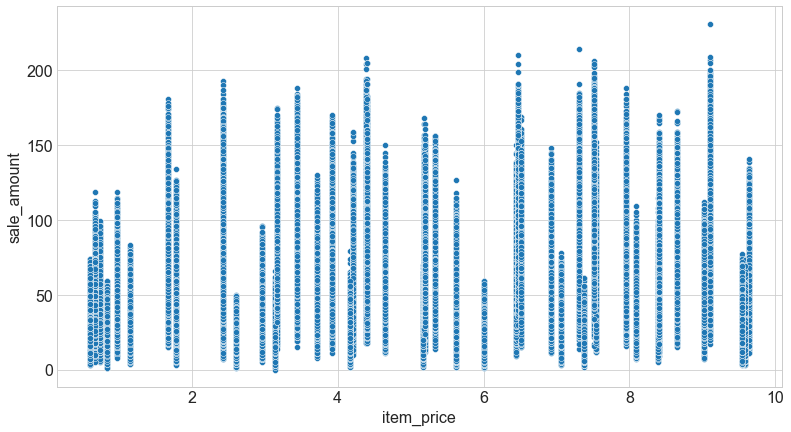

In [6]:
sns.scatterplot(data=df, x='item_price', y='sale_amount')



## Set the index to be the datetime variable.

In [7]:
# Set the index as that date and then sort index (by the date)
df = df.set_index("sale_date").sort_index()

## Add a 'month' and 'day of week' column to your dataframe.


In [29]:
    # Set the index as that date and then sort index (by the date)
    df = df.set_index("sale_date").sort_index()
    # adding month column to dataframe(date is in index so must use df.index)
    df['month'] = df.index.month
    # adding day of week to dataframe (date is in index so must use df.index)
    df['day'] = df.index.day_name()



,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,Tuesday,10.92
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,1,Tuesday,30.16
2013-01-01,10,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX,1,Tuesday,308.48
2013-01-01,3,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,45,2118 Fredericksburg Rdj,78201,San Antonio,TX,1,Tuesday,197.55
2013-01-01,3,19,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,34,2118 Fredericksburg Rdj,78201,San Antonio,TX,1,Tuesday,25.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31,7,39,28400029254,28400029254,Munchies,Munchies Sandwich Crackers Cheddar Cheese On G...,9.02,706662,31,12018 Perrin Beitel Rd,78217,San Antonio,TX,12,Sunday,279.62
2017-12-31,7,40,42272008063,42272008063,Amys,Amys Light & Lean Spaghetti Italiano,0.60,724922,22,12018 Perrin Beitel Rd,78217,San Antonio,TX,12,Sunday,13.20
2017-12-31,7,41,31000670016,31000670016,P.f. Changs,P.f. Changs Home Menu Meal For Two Beef With B...,5.62,743182,19,12018 Perrin Beitel Rd,78217,San Antonio,TX,12,Sunday,106.78


In [ ]:
def add_month_day(df,date_column):
    '''this function will set the index to the dat column and add a month and day column'''
    
    # adding month column to dataframe(date is in index so must use df.index)
    df['month'] = df.index.month
    # adding day of week to dataframe (date is in index so must use df.index)
    df['day'] = df.index.day_name()

## Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.


In [92]:
# add sales_total column 
df['sales_total'] = df['sale_amount']*df['item_price']

KeyError: 'sale_amount'

In [93]:
def sales_total(df,sum_total_column,x,y):
    '''this function will create a sum from two columns'''
    # calculate total sales_total column 
    df['sum_total_column'] = df[x]*df[y]

In [94]:
sales_total(df,'sum_total','sale_amount','item_price')

df

KeyError: 'sale_amount'

## Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.


**Using OPS data (hint: if you don't know how to acquire this data, do a bit of google searching on how to do this with pandas):**
- Acquire the Open Power Systems Data for Germany, which has been rapidly expanding its renewable energy production in recent years. The data set includes country-wide totals of electricity consumption, wind power production, and solar power production for 2006-2017. You can get the data here: https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv
- Convert date column to datetime format.
- Plot the distribution of each of your variables.
- Set the index to be the datetime variable.
- Add a month and a year column to your dataframe.
- Fill any missing values.
- Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

## - Acquire the Open Power Systems Data for Germany, which has been rapidly expanding its renewable energy production in recent years. The data set includes country-wide totals of electricity consumption, wind power production, and solar power production for 2006-2017. You can get the data here: https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv

In [69]:
# acquire data 
df = pd.read_csv('opsd_germany_daily.csv')

df

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


##  Convert date column to datetime format.



In [79]:
# Convert date column to datetime format.
date_time_conversion(df,'Date')

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
 2   Wind         2920 non-null   float64       
 3   Solar        2188 non-null   float64       
 4   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.3 KB


## Plot the distribution of each of your variables.


array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Consumption'}>],
       [<AxesSubplot:title={'center':'Wind'}>,
        <AxesSubplot:title={'center':'Solar'}>],
       [<AxesSubplot:title={'center':'Wind+Solar'}>, <AxesSubplot:>]],
      dtype=object)

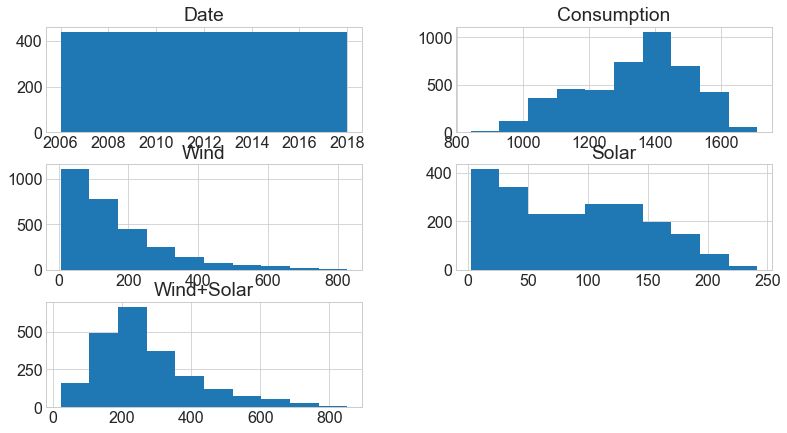

In [85]:
# Plot the distribution of each of your variables.
df.hist()

##  Set the index to be the datetime variable.

In [86]:
#Set the index to be the datetime variable.

# Set the index as that date and then sort index (by the date)
df = df.set_index("Date").sort_index()

## Add a month and a year column to your dataframe.

In [87]:
# adding year column to dataframe(date is in index so must use df.index)
df['year'] = df.index.year
# adding month of week to dataframe (date is in index so must use df.index)
df['month'] = df.index.month

## Fill any missing values.

In [88]:
df

,Consumption,Wind,Solar,Wind+Solar,year,month
Date,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,2006,1
2006-01-02,1380.52100,NaN,NaN,NaN,2006,1
2006-01-03,1442.53300,NaN,NaN,NaN,2006,1
2006-01-04,1457.21700,NaN,NaN,NaN,2006,1
2006-01-05,1477.13100,NaN,NaN,NaN,2006,1
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12


## Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.